In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

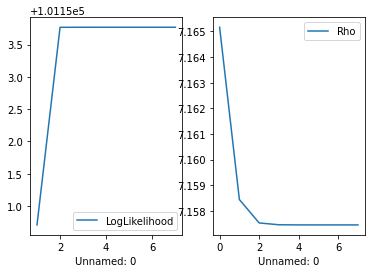

In [2]:
df=pd.read_csv('arrays_in_whole_dataset_v6_LogLikelihoods.csv',sep='\t')
fig, axes = plt.subplots(nrows=1, ncols=2)

df.plot(x='Unnamed: 0',y='LogLikelihood',ax=axes[0])
df.plot(x='Unnamed: 0',y='Rho',ax=axes[1])

In [3]:
dist=pd.read_csv('arrays_in_whole_dataset_v6_pairwiseDist.csv',sep='\t',index_col=0)
dist

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,NaN,0.796817,1.000096,1.446541,1.451667,1.458727,1.940658,1.461601,1.940658,0.535300,...,1.931637,1.940658,1.451026,0.382518,0.704717,0.128776,0.382517,-0.996602,-0.469214,0.197424
1,0.796817,NaN,1.796912,2.243357,2.248483,2.255542,2.737474,2.258417,2.737474,1.332116,...,2.728452,2.737474,2.247842,1.179334,1.501533,0.925591,1.179334,-0.199786,0.327602,0.994239
2,1.000096,1.796912,NaN,0.447339,0.451571,0.432314,0.696646,0.217590,0.696646,1.801452,...,0.905223,0.696646,0.424613,1.382613,1.970869,1.394927,1.382613,0.269550,0.796938,1.463575
3,1.446541,2.243357,0.447339,NaN,0.898910,0.878759,1.143092,0.664035,1.143092,2.247897,...,1.351669,1.143092,0.871058,1.829058,2.417314,1.841372,1.829058,0.715995,1.243383,1.910020
4,1.451667,2.248483,0.451571,0.898910,NaN,0.883885,1.148217,0.669161,1.148217,2.253023,...,1.356795,1.148217,0.876184,1.834184,2.422440,1.846498,1.834184,0.721121,1.248509,1.915146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.128776,0.925591,1.394927,1.841372,1.846498,1.853558,2.335489,1.856432,2.335489,4.847885,...,2.326468,2.335489,1.845857,0.511293,0.575942,NaN,0.511293,1.354460,1.881848,3.591921
119,0.382517,1.179334,1.382613,1.829058,1.834184,1.841244,2.323175,1.844119,2.323175,0.917817,...,2.314154,2.323175,1.833543,0.765035,1.087235,0.511293,NaN,-0.614084,-0.086696,0.579941
120,-0.996602,-0.199786,0.269550,0.715995,0.721121,0.728181,1.210112,0.731055,1.210112,3.722508,...,1.201091,1.210112,0.720480,-0.614084,1.930402,1.354460,-0.614084,NaN,1.476870,2.466544
121,-0.469214,0.327602,0.796938,1.243383,1.248509,1.255569,1.737500,1.258443,1.737500,4.249896,...,1.728478,1.737500,1.247868,-0.086696,2.457790,1.881848,-0.086696,1.476870,NaN,2.993932


In [4]:

pop_vals= pd.read_csv('../Mydata/ALLCRISPRs_haplo_matches_at_5_dist_V6_sorted.txt',sep=',',header=0,index_col=0)
pop_vals=pop_vals.T.drop('seq.id',axis=0).iloc[:,:dist.shape[0]]
pop_vals[pop_vals.isna()] = 0
pop_vals = pop_vals.astype(float)

meta1=pd.read_csv('../Mydata/metadata_env.txt',sep='\t',header=0)
meta1

meta2=pd.read_csv('../Mydata/CRISPR_metadata.txt',sep='\t',header=0)
meta2

meta3=pd.merge(meta1,meta2,how='inner',on='Site')
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6368.5 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return(d)
# print(meta3.lat)
meta3.lat = [sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.lat.values]
meta3.long = [-sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.long.values]
meta3.Sample = [string[4:] for string in meta3.Sample.values]
# meta=meta3
# print(meta3)
pop_vals=pop_vals/pop_vals.sum(axis=1).to_numpy().reshape(-1,1)

pop_vals['Sample']=pop_vals.index
pop_vals

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,Sample
R09L-3-T,0.000000,0.000000,0.744493,0.000000,0.000000,0.176211,0.000000,0.008811,0.013216,0.000000,...,0.004405,0.000000,0.004405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R09L-3-T
R16L-4-T,0.000000,0.000000,0.008403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.983193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R16L-4-T
R08H-1-T,0.000000,0.000000,0.821577,0.000000,0.004149,0.000000,0.012448,0.020747,0.095436,0.004149,...,0.000000,0.000000,0.004149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R08H-1-T
R07B-2-Tc,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.947917,0.000000,0.000000,...,0.000000,0.003472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R07B-2-Tc
R07B-1-Ta,0.000000,0.000000,0.598870,0.000000,0.000000,0.000000,0.000000,0.372881,0.000000,0.005650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R07B-1-Ta
R02H-8-T,0.000000,0.000000,0.892473,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R02H-8-T
R15H-3-T,0.002695,0.000000,0.002695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R15H-3-T
R15H-7-T,0.000000,0.000000,0.004839,0.000000,0.000000,0.000000,0.000000,0.000000,0.001613,0.980645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R15H-7-T
R16L-3-T,0.000000,0.000000,0.006803,0.000000,0.000000,0.002268,0.000000,0.002268,0.002268,0.984127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R16L-3-T
R07B-3-T,0.000000,0.000000,0.505208,0.000000,0.010417,0.005208,0.010417,0.348958,0.005208,0.046875,...,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,R07B-3-T


In [5]:
meta=pd.read_csv('../Mydata/CRISPR_metadata.txt',sep='\t',header=0,index_col=0)
meta['Sample']= [str[4:] for str in meta.Sample.values]
# print(pop_vals.Sample)
[meta[meta.Sample == val].Region.values[0] for val in pop_vals.Sample]
# ['red' if l == 'MV' else 'green' if l=='CB' else 'blue' for l in [meta[meta.Sample == val].Region.values[0] for val in pop_vals.Sample]]

['MEF',
 'MV',
 'MEF',
 'MEF',
 'MEF',
 'MEF',
 'MV',
 'MV',
 'MV',
 'MEF',
 'MEF',
 'CB',
 'MEF',
 'MEF',
 'MV',
 'MEF',
 'MEF',
 'MV',
 'MEF',
 'MEF',
 'MEF',
 'MEF',
 'MEF',
 'MEF',
 'MEF',
 'CB',
 'MEF',
 'CB',
 'CB',
 'MEF',
 'CB',
 'MEF',
 'MEF',
 'MV',
 'MV',
 'MEF',
 'MEF',
 'MV',
 'MEF',
 'MV',
 'MEF',
 'MV',
 'MEF',
 'MV']

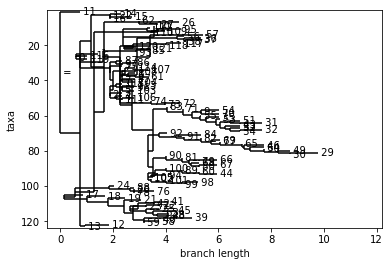

In [6]:
import networkx as nx
from Bio import Phylo
Trees = [tree for tree in Phylo.parse('../Output1.2/arrays_in_whole_dataset_v6.nwk', 'newick')]

Tree= Trees[0]
Phylo.draw(Tree)

In [7]:
pop_vals2= pd.read_csv('../Mydata/ALLCRISPRs_haplo_matches_at_5_dist_V6_sorted.txt',sep=',',header=0,index_col=0)

pop_vals2=pop_vals2.iloc[:,1:]
# pop_vals2[pop_vals2.isna()] = 0
pop_vals2


,R09L-3-T,R16L-4-T,R08H-1-T,R07B-2-Tc,R07B-1-Ta,R02H-8-T,R15H-3-T,R15H-7-T,R16L-3-T,R07B-3-T,...,R15H-2-T_bis,R08H-2-Ta,R02H-9-T,R16L-2-T,R08H-2-Tc,R15H-2-T,R09L-4-Ta,R16L-5-T,R08H-2-Tb,R16L-1-T
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,169.0,2.0,198.0,8.0,106.0,83.0,1.0,3.0,3.0,97.0,...,5.0,219.0,51.0,1.0,318.0,1.0,17.0,2.0,166.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


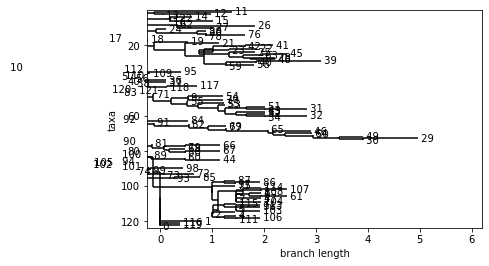

(((((((((((((((((11:1.50334,(12:0.91798,13:0.00000):0.18363):0.42420,(14:0.41209,(122:0.00000,(15:0.81855,16:0.00000):0.00000):0.00281):0.74006):0.48459,(62:0.00000,(26:1.50326,27:0.68467):0.00000):1.35700):-0.37842,((24:0.18885,(88:0.16991,(20:0.00000,(76:0.73960,78:0.00000):0.00000):0.16991):0.79490):1.29052,(17:0.75252,(18:0.66099,(19:0.65917,(21:0.65399,(((41:0.53681,42:0.00000):0.63096,((22:0.53681,23:0.00000):0.57881,(25:0.50141,((45:0.47291,63:0.00000):0.36955,(28:0.47356,48:0.47356):0.14043):0.27002):0.58026):-0.26779):0.16169,((39:1.24351,40:0.00000):0.57977,(58:0.53681,59:0.00000):0.00166):0.42082):0.36409):0.60754):0.76768):0.90424):-0.42460):-0.71789):2.29797,10:0.00000):-1.17269,(112:0.12599,(95:0.86272,(109:0.53681,110:0.00000):-0.26841):0.40358):0.90198):1.01317,57:2.00216):-0.48458,(56:0.28963,(36:0.62299,(37:0.62147,38:0.00000):0.00152):0.29972):1.48924):-0.67262,((117:0.57594,118:0.00000):1.23992,(120:0.47474,121:1.00213):-0.36020):0.52172):0.45904,((83:0.00000,(71:0.

In [47]:
from ete3 import Tree,PhyloTree
import networkx as nx
from Bio import Phylo
import re

Trees = [tree for tree in Phylo.parse('../Output1.2/arrays_in_whole_dataset_v6.nwk', 'newick')]
mytree1= Trees[0]
mytree1.root_with_outgroup({'name': '0'})  # Operates in-place
Phylo.draw(mytree1)

# print(mytree.format('newick'))
mytree_str=mytree1.format('newick')

stripped = re.sub(r'\[.*?\]', '', mytree_str)
print( stripped)


In [56]:
G = Phylo.to_networkx(mytree1)
color= ['red' if l == 'MV' else 'green' if l=='CB' else 'blue' for l in [meta[meta.Sample == val].Region.values[0] for val in pop_vals2.columns]]
color= ['MV' if l == 'MV' else 'CB' if l=='CB' else 'MEF' for l in [meta[meta.Sample == val].Region.values[0] for val in pop_vals2.columns]]

color_map=dict(zip(meta.Sample,color))

# print(G)
# print(dict([(n,n.name) for n in G]))
pos=nx.fruchterman_reingold_layout(G)
# pos=nx.spectral_layout(G)
# pos=nx.spring_layout(G)
colormap=[]
nodenames=[]
for node in G:
    colormap+=['white']
    nodenames+=[node.name]
    if node.name not in [None,'=']:
#         print(node.name)
        if pop_vals2.loc[int(node.name)].count() ==1:
#             print(node.name)
#             print(pop_vals2.loc[int(node.name)].dropna().index[0])
#             print(len(colormap))
            sample=str(pop_vals2.loc[int(node.name)].dropna().index[0])
#             print(sample,color_map[sample])
            colormap=colormap[:-1]+[color_map[sample]]
#             print(len(colormap))
            
color_dict=dict(zip(nodenames,colormap))


['122',
 '15',
 '62',
 '26',
 '27',
 '21',
 '42',
 '23',
 '45',
 '63',
 '48',
 '40',
 '58',
 '95',
 '109',
 '57',
 '117',
 '118',
 '120',
 '121',
 '83',
 '55',
 '43',
 '33',
 '92',
 '91',
 '69',
 '49',
 '29',
 '30',
 '90',
 '81',
 '79',
 '60',
 '44',
 '105',
 '102',
 '101',
 '74',
 '73',
 '85',
 '93',
 '87',
 '86',
 '75',
 '114',
 '107',
 '108',
 '61',
 '47',
 '104',
 '113',
 '96',
 '103',
 '111',
 '119']

In [49]:
mytree=Tree(stripped,format=1)
# print(mytree)
edge = 0
for node in mytree.traverse():
    if node.is_leaf():
#         print(node.name)
        node.add_feature("unique_host", color_dict[node.name])
#         edge += 1

with open('test_mytree_labels.nkw','w') as fa:
    fa.write(mytree.write(format=9, features=["label", "unique_host"]))

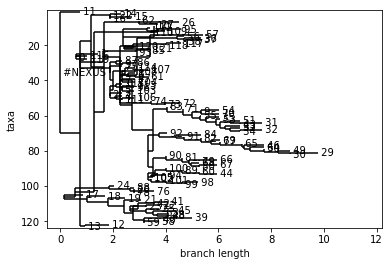

['122', '15', '62', '26', '27', '21', '42', '23', '45', '63', '48', '40', '58', '95', '109', '57', '117', '118', '120', '121', '83', '55', '43', '33', '92', '91', '69', '49', '29', '30', '90', '81', '79', '60', '44', '105', '102', '101', '74', '73', '85', '93', '87', '86', '75', '114', '107', '108', '61', '47', '104', '113', '96', '103', '111', '119']

   /-11
  |
  |         /-14
  |      /-|
  |     |   \- /- /-16
  |     |
  |     |   /- /-
  |     |  |
  |     |  |      /-10
  |     |  |     |
  |     |  |     |      /-112
  |     |  |     |   /-|
  |     |  |     |  |   \- /- /-110
  |     |  |   /-|  |
  |     |  |  |  |  |         /-56
  |     |  |  |  |  |      /-|
  |     |  |  |  |  |     |  |   /-36
  |     |  |  |  |  |     |   \-|
  |     |  |  |  |  |     |     |   /-37
  |   /-|  |  |   \-|     |      \-|
  |  |  |  |  |     |     |         \-38
  |  |  |  |  |     |     |
  |  |  |  |  |     |     |      /-
  |  |  |  |  |     |     |   /-|
  |  |  |  |  |     |     |  

In [92]:
## trying to remove unique alleles from tree

from ete3 import Tree
import re
from Bio import Phylo
import re

Trees = [tree for tree in Phylo.parse('../Output1.2/arrays_in_whole_dataset_v6.nwk', 'newick')]
mytree1= Trees[0]
# mytree1.root_with_outgroup({'name': '0'})  # Operates in-place
Phylo.draw(mytree1)

# print(mytree.format('newick'))
mytree_str=mytree1.format('newick')

stripped = re.sub(r'\[.*?\]', '', mytree_str)
# print( stripped)
def find_id(file,id):

    f= open(file) 
    s = open(file).read()
    if re.search(id,s,re.MULTILINE):
        found= True
    else: 
        found= False
    return found

def remove_nodes(treeFile,idFile):  

    t= Tree(treeFile,format=0)
#     print( t.get_ascii())
    removed=[]
#     for node in t.iter_descendants():
    for node in t:

        # print node.namek
        if not node.name not in idFile:
            node.delete(prevent_nondicotomic=False)
#             print(node.get_edges())
            removed.append(node)

#     print( [n.name for n in removed])
    print( t.get_ascii())
    t.write(format=1, outfile="newtree.nw")


treeFile=stripped[:-16]+';'
# print(treeFile)
idFile=[k for k,v in color_dict.items() if v != 'white']
print(idFile)
remove_nodes(treeFile,idFile)

In [78]:
## trying to remove unique alleles from tree

from ete3 import Tree
import re
from Bio import Phylo
import re

Trees = [tree for tree in Phylo.parse('../Output1.2/arrays_in_whole_dataset_v6.nwk', 'newick')]
mytree1= Trees[0]
# mytree1.root_with_outgroup({'name': '0'})  # Operates in-place
Phylo.draw(mytree1)

# print(mytree.format('newick'))
mytree_str=mytree1.format('newick')

stripped = re.sub(r'\[.*?\]', '', mytree_str)
# print( stripped)
def find_id(file,id):

    f= open(file) 
    s = open(file).read()
    if re.search(id,s,re.MULTILINE):
        found= True
    else: 
        found= False
    return found

def remove_nodes(treeFile,idFile):  

    t= Tree(treeFile,format=0)
#     print( t.get_ascii())
    removed=[]
#     for node in t.iter_descendants():
    for node in t:

        # print node.namek
        if not node.name not in idFile:
            node.name='singleton'
#             print(node.get_edges())
            removed.append(node)

#     print( [n.name for n in removed])
    print( t.get_ascii())
    t.write(format=1, outfile="newtree.nw")


treeFile=stripped[:-16]+';'
# print(treeFile)
idFile=[k for k,v in color_dict.items() if v != 'white']
remove_nodes(treeFile,idFile)

14

(-1.5, 1.5)

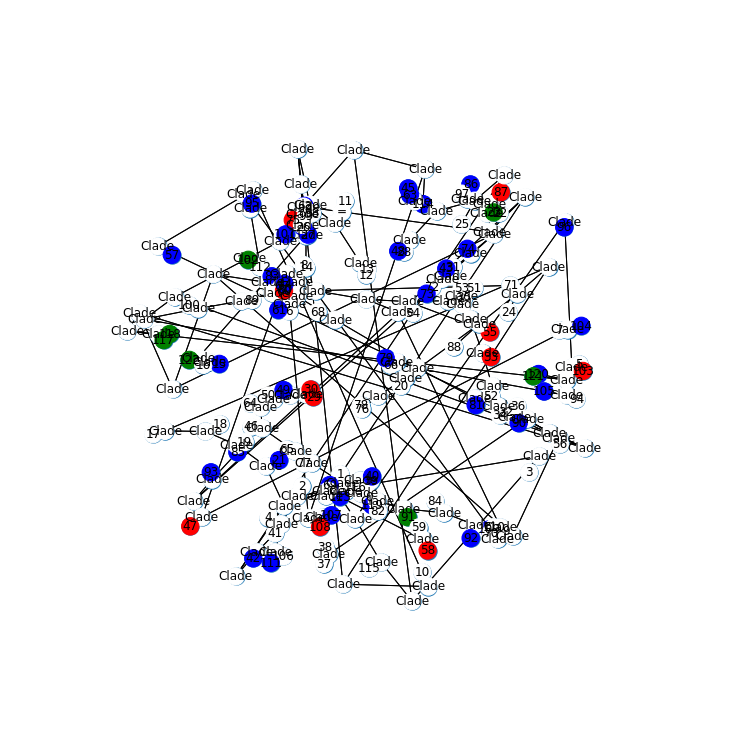

In [60]:
        

fig=plt.figure(figsize=(10,10))
ax=plt.axes([0,0,1,1])
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,arrows=False,ax=ax)
nx.draw_networkx_nodes(G,pos,ax=ax,color=colormap,label=None)

nx.draw(G,pos,arrows=False,node_color=colormap,with_labels=True)

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

# trans=ax.transData.transform
# trans2=fig.transFigure.inverted().transform

# init_piesize=0.1
# init_p2=init_piesize/2.0


# for n in G:
#     xx,yy=trans(pos[n]) # figure coordinates
#     xa,ya=trans2((xx,yy)) # axes coordinates
#     piesize=init_piesize
#     p2=init_p2
#     a = plt.axes([xa-p2,ya-p2, piesize, piesize])
#     a.set_aspect('equal')
#     fracs = [0]
#     if n.name in list(map(str,pop_vals2.index.values)):
# #         print(n.name)
# #         piesize=init_piesize*pop_vals.loc[int(n.name)]
# #         p2 = piesize/2
#         fracs = pd.Series([1 if v>0 else np.nan for v in pop_vals2.loc[int(n.name)]]).dropna()
# #         fracs = pop_vals2.loc[int(n.name)]
# #         print(fracs)
# #         print(len(set(fracs)))
# #         break
#     a.pie(fracs,colors=color)


# plt.savefig('pc.png')